## Base de Dados: Covid 19 - Pandemic - Worldwide

Fonte: https://public.opendatasoft.com/explore/dataset/covid-19-pandemic-worldwide-data/information/?disjunctive.zone&disjunctive.category

In [70]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Importando Dados

In [71]:
dados = pd.read_csv('./dataset/covid-19-pandemic-worldwide-data.csv', sep=';')

### Análise Exploratória

In [72]:
dados.head()

,Zone,Sub Zone,Category,Date,Count,Location
0,Eritrea,NaN,Confirmed,2022-01-26,9408,"15.1794, 39.7823"
1,Eritrea,NaN,Confirmed,2022-04-22,9734,"15.1794, 39.7823"
2,Eritrea,NaN,Confirmed,2022-05-15,9745,"15.1794, 39.7823"
3,Eritrea,NaN,Confirmed,2022-05-24,9755,"15.1794, 39.7823"
4,Eritrea,NaN,Confirmed,2022-06-12,9771,"15.1794, 39.7823"


In [73]:
dados.shape

(973836, 6)

In [74]:
dados.dtypes

Zone        object
Sub Zone    object
Category    object
Date        object
Count        int64
Location    object
dtype: object

In [75]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973836 entries, 0 to 973835
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Zone      973836 non-null  object
 1   Sub Zone  293751 non-null  object
 2   Category  973836 non-null  object
 3   Date      973836 non-null  object
 4   Count     973836 non-null  int64 
 5   Location  968121 non-null  object
dtypes: int64(1), object(5)
memory usage: 44.6+ MB


In [76]:
type(dados)

pandas.core.frame.DataFrame

In [77]:
df = dados[['Zone', 'Category', 'Date', 'Count']]

In [78]:
df.head(10)

,Zone,Category,Date,Count
0,Eritrea,Confirmed,2022-01-26,9408
1,Eritrea,Confirmed,2022-04-22,9734
2,Eritrea,Confirmed,2022-05-15,9745
3,Eritrea,Confirmed,2022-05-24,9755
4,Eritrea,Confirmed,2022-06-12,9771
5,Eritrea,Confirmed,2022-08-16,10141
6,Eritrea,Confirmed,2022-12-01,10189
7,Eritrea,Confirmed,2022-12-19,10189
8,Estonia,Confirmed,2020-01-23,0
9,Estonia,Confirmed,2020-03-13,79


Verificando dados ausentes

In [79]:
df.isna().sum()

Zone        0
Category    0
Date        0
Count       0
dtype: int64

Verificando dados nulos

In [80]:
df.isnull().sum()

Zone        0
Category    0
Date        0
Count       0
dtype: int64

Verificando Coluna Categoria

In [81]:
df.Category.value_counts()

Category
Confirmed    330327
Deaths       330327
Recovered    313182
Name: count, dtype: int64

In [82]:
# Configuração de estilo
sns.set(style="darkgrid")

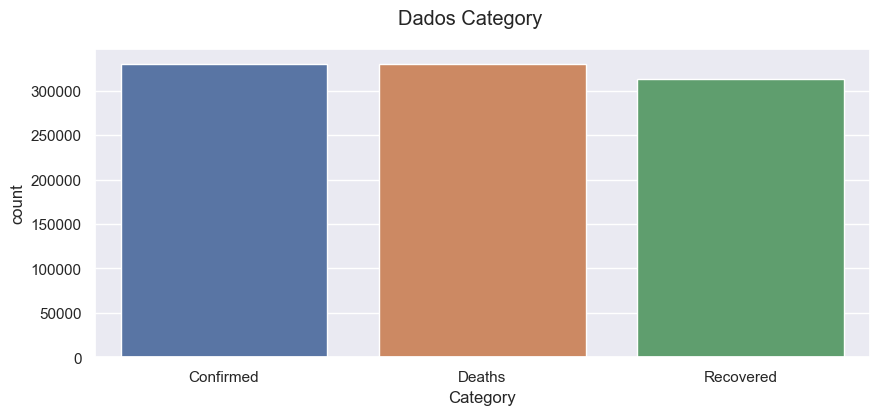

In [84]:
# Plot de Category
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Dados Category')
sns.countplot(data = df, x = 'Category');

Excluir linhas de casos "Confirmed" da coluna "Category"

In [122]:
df2 = df[df['Category'].isin(['Deaths','Recovered'])]

In [123]:
df2.shape

(643509, 4)

In [124]:
df2.Category.value_counts()

Category
Deaths       330327
Recovered    313182
Name: count, dtype: int64

Calculando a Frequencia

In [125]:
freq_category = df2.Category.value_counts()

In [126]:
freq_category

Category
Deaths       330327
Recovered    313182
Name: count, dtype: int64

In [127]:
freq_category_percentual = df2['Category'].value_counts(normalize=True)*100

In [128]:
freq_category_percentual

Category
Deaths       51.332149
Recovered    48.667851
Name: proportion, dtype: float64

In [129]:
dist_freq_qualit = pd.DataFrame({'Frequencia': freq_category, 'Porcentagem %': freq_category_percentual})


Tabela de Frequência

In [130]:
dist_freq_qualit

,Frequencia,Porcentagem %
Category,,
Deaths,330327,51.332149
Recovered,313182,48.667851


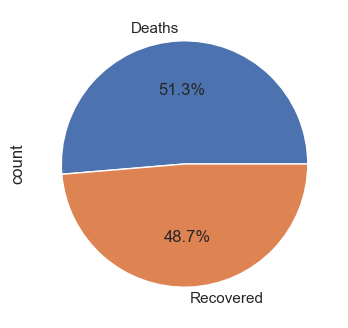

In [131]:
# Plot de Category
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('')
df2['Category'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

Visão por Ano

In [132]:
df2['Date'] = pd.to_datetime(df['Date'], dayfirst= True)

In [133]:
df2.dtypes

Zone                object
Category            object
Date        datetime64[ns]
Count                int64
dtype: object

In [135]:
df2['Date'] = df2['Date'].dt.year

In [136]:
df2['Date'].value_counts()

Date
2022    205495
2021    205495
2020    194235
2023     38284
Name: count, dtype: int64

In [137]:
contagem_ano = df2.groupby('Date')['Count'].sum()

In [138]:
contagem_ano

Date
2020     4978937967
2021    20167639866
2022     2301003842
2023      463691228
Name: Count, dtype: int64

Tabela Frequencia Ano

In [139]:
freq_ano = df2.Date.value_counts()

In [140]:
freq_ano

Date
2022    205495
2021    205495
2020    194235
2023     38284
Name: count, dtype: int64

In [141]:
freq_date_percentual = df2['Date'].value_counts(normalize=True)*100

In [142]:
freq_date_percentual

Date
2022    31.933508
2021    31.933508
2020    30.183727
2023     5.949256
Name: proportion, dtype: float64

In [143]:
dist_freq_qualit_ano = pd.DataFrame({'Frequencia': freq_ano, 'Porcentagem %': freq_date_percentual})

In [144]:
dist_freq_qualit_ano

,Frequencia,Porcentagem %
Date,,
2022,205495,31.933508
2021,205495,31.933508
2020,194235,30.183727
2023,38284,5.949256


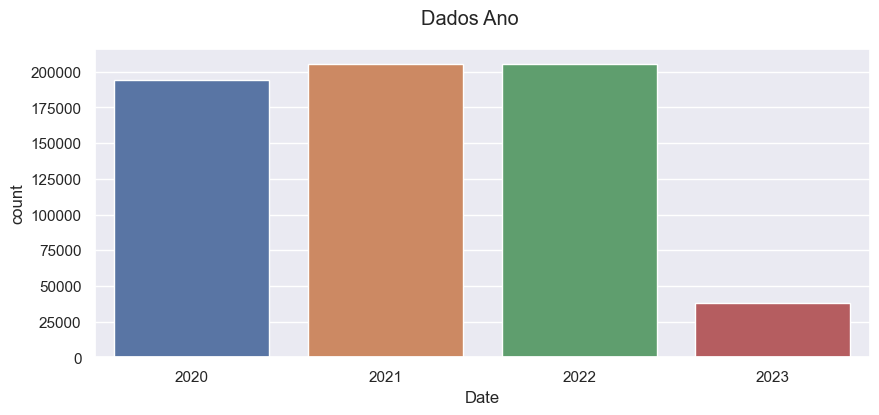

In [145]:
# Plot por Ano
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Dados Ano')
sns.countplot(data = df2, x = 'Date');

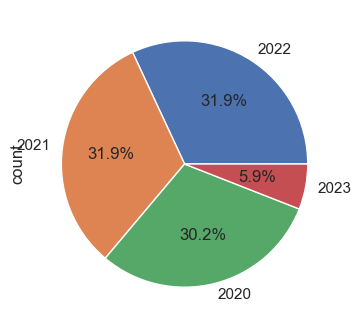

In [146]:
# Plot de Ano
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('')
df2['Date'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

Tabela de Contingência

In [147]:
conting_ano_category = pd.crosstab(df2['Category'], df2['Date'])

In [148]:
conting_ano_category

Date,2020,2021,2022,2023
Category,,,,
Deaths,99705,105485,105485,19652
Recovered,94530,100010,100010,18632


Tabela de Contingência com três variáveis

In [151]:
cross_tab_ano_category_zone = pd.crosstab(index = [df2['Category'], df2['Zone']], columns= df2['Date'], margins=True, margins_name="Total Zone")

In [152]:
cross_tab_ano_category_zone

Date                               2020    2021    2022   2023  Total Zone
Category   Zone                                                           
Deaths     Afghanistan              345     365     365     68        1143
           Albania                  345     365     365     68        1143
           Algeria                  345     365     365     68        1143
           Andorra                  345     365     365     68        1143
           Angola                   345     365     365     68        1143
...                                 ...     ...     ...    ...         ...
Recovered  Winter Olympics 2022     345     365     365     68        1143
           Yemen                    345     365     365     68        1143
           Zambia                   345     365     365     68        1143
           Zimbabwe                 345     365     365     68        1143
Total Zone                       194235  205495  205495  38284      643509

[403 rows x 5 columns]

Visão por Paises

In [89]:
df2.Zone.value_counts()

Zone
China             77724
United Kingdom    34290
France            27432
Canada            19431
Australia         18288
                  ...  
Israel             2286
Italy              2286
Jamaica            2286
Japan              2286
Montenegro         2286
Name: count, Length: 201, dtype: int64

Top 10 Paises

In [159]:
maiores_zones = df2.groupby('Zone')['Count'].sum().reset_index().sort_values(by= 'Count', ascending = False).head(10)

In [160]:
maiores_zones

,Zone,Count
80,India,5224309094
24,Brazil,3900531387
147,Russia,1349047792
186,US,1210849043
184,Turkey,982067721
86,Italy,887174718
38,Colombia,835701140
7,Argentina,802647469
67,Germany,791307046
117,Mexico,739288765
